# DDRTree

**Created**: 19 November 2021

## Environment

In [2]:
if (!requireNamespace("viridis")) {
    install.packages("viridis")
}

if (!requireNamespace("DDRTree")) {
    install.packages("DDRTree")
}

if (!requireNamespace("dequer")) {
    install.packages("dequer")
}

if (!requireNamespace("patchwork")) {
    install.packages("devtools")
    devtools::install_github("thomasp85/patchwork")
}

if (!requireNamespace("Rcpp")) {
    install.packages("Rcpp")
}

Loading required namespace: DDRTree

Loading required namespace: dequer

Loading required namespace: patchwork

Loading required namespace: Rcpp



In [3]:
library(tidyverse)
library(viridis)
library(RColorBrewer)
library(DDRTree)
library(dequer)
library(patchwork)
library(Rcpp)

setwd("~/eQTL_pQTL_Characterization/")

source("04_Expression/scripts/utils/ggplot_theme.R")

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: irlba

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘dequer’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:utils’:

    stack




## Load Data

In [4]:
gene.exp <- read.table("/nfs/team282/data/gains_team282/Logcpm_864_20416.txt")

In [5]:
head(gene.exp)

,UK02270173_3,UK15130120_3,UK58000006_3,UK47010004_3,UK42020088_5,UK47490007_3,UK02770164_3,UK02770164_5,UK02630151_3,UK42150107_1,⋯,UK59070043_3,UK59070043_5,UK02510223_3,UK02XX0336_5,UK29090086_3,UK02XX0335_1,UK02XX0334_3,UK01210130_3,UK01210130_5,UK01380125_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,0.3401282,0.06630101,0.2155440,0.108816,0.2214732,0.3228511,0.1894481,0.1680256,0.1470579,0.2646673,⋯,0.09238847,0.1871883,0.2534386,0.1963665,0.1320226,0.1184420,0.0374473,0.2587047,0.06985693,0.1493179
ENSG00000000419,4.8989199,4.70671481,4.8093922,4.691238,4.7486796,4.8117996,4.2683317,4.6288039,5.0245350,4.8937124,⋯,4.83012935,4.6559426,4.3112421,4.5154688,4.9760699,5.1501520,4.6847354,4.5613882,4.43223953,4.7391652
ENSG00000000457,4.4659965,3.92401988,4.4707979,4.382662,4.3537634,4.2871301,4.2746213,3.9634786,4.3214736,4.5577903,⋯,4.25705997,4.1022256,4.1332239,4.1464680,4.3766166,4.4792895,4.4652971,4.3309056,4.32204508,4.4516802
ENSG00000000460,1.8228693,1.47876023,2.3115276,1.933702,1.9085557,1.4049652,2.5218212,2.4256214,1.6371053,1.9458270,⋯,2.01512414,2.2450850,1.6528313,2.2157478,1.7083862,2.2523924,1.7847364,1.9348214,1.93655978,1.8439108
ENSG00000000938,9.5811589,10.09504851,10.1411895,10.962529,10.8182765,10.4449187,10.4777265,9.6431889,11.4328930,11.2090699,⋯,10.38927410,10.3054277,8.9388342,9.8605095,10.5543863,10.8472637,10.1322091,9.5348610,9.35975498,10.4238933
ENSG00000000971,1.3758538,1.74477932,0.8001246,1.621096,0.7343902,1.9102720,1.9600462,2.7561749,0.3223756,1.9952402,⋯,0.81601669,1.0996160,1.7383555,0.7404709,1.1255782,0.6247017,1.9311926,2.1091326,2.23147478,1.4566588


In [6]:
eigengenes <- read.csv("~/gains_team282/nikhil/expression/gene_expression/eigengenes.csv", row.names=1)

In [7]:
head(eigengenes)

,ME_1,ME_2,ME_3,ME_4,ME_5,ME_6,ME_7,ME_8,ME_9,ME_10,⋯,ME_93,ME_94,ME_95,ME_96,ME_97,ME_98,ME_99,ME_100,ME_101,ME_102
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
UK02270173_3,-0.004016761,0.0131288362,0.012922995,0.0198498797,3.383056e-02,-0.039966176,0.005354281,-0.0211679904,-0.027451784,0.03952232,⋯,0.006575767,-0.028728582,-0.03729801,0.043022404,-0.0192214374,0.03598091,-0.016450340,-1.430486e-02,0.002054619,-0.0227187339
UK15130120_3,-0.040355825,-0.0373633701,-0.037740919,-0.0338750499,5.196139e-02,-0.006089546,0.045834342,0.0125998600,-0.036202649,0.02845066,⋯,-0.013731651,0.009439119,0.03427102,-0.004792438,0.0177044227,-0.01290833,0.009937368,-1.432283e-03,0.023780148,0.0665501710
UK58000006_3,0.017874404,0.0338113509,0.031702433,0.0406118756,-1.518636e-02,-0.042531490,-0.024265188,-0.0318948668,-0.001456555,0.03152360,⋯,0.030235031,-0.031956047,0.03606182,0.040327298,-0.0296712170,-0.01004244,0.004177996,8.313083e-06,-0.023067183,-0.0329058743
UK47010004_3,0.012801750,0.0245485074,0.005824561,-0.0004263318,2.878363e-05,0.010860551,-0.019345838,0.0001834165,0.020287442,-0.01165775,⋯,-0.011427559,0.002238300,0.02918488,0.055206423,-0.0007805494,0.03078110,-0.022525898,3.158067e-02,-0.001655534,-0.0200397478
UK42020088_5,0.015278469,0.0031038292,0.001330092,-0.0082301825,-1.119995e-02,0.018312815,-0.001452981,-0.0020318233,0.023234302,-0.01233832,⋯,-0.002033550,0.010261302,0.03292444,0.022190082,0.0019940929,0.06523837,0.005029935,-5.781497e-03,0.001393142,0.0007287678
UK47490007_3,-0.016379785,0.0003279949,-0.031553778,-0.0372634499,7.738828e-03,0.046194030,0.020741679,0.0381623216,0.001531147,-0.02330114,⋯,-0.036684782,0.052620174,0.02662062,0.026181653,0.0051302207,0.03837936,-0.015972196,3.551496e-02,-0.007530462,-0.0141834511


In [8]:
sample.info <- read.table("/nfs/team282/data/gains_team282/Sample_info_864.txt")
sample.info <- sample.info %>% 
  dplyr::filter(supplier_name %in% rownames(eigengenes))
rownames(sample.info) <- sample.info$supplier_name
sample.info <- sample.info[rownames(eigengenes),]

In [9]:
head(sample.info)

,manual_qc,id_study_lims,name,description,sanger_sample_id,supplier_name,last_updated,id_library_lims,id_pool_lims,id_iseq_flowcell_tmp,⋯,TIN.mean.,TIN.median.,TIN.stdev.,Concentration,num_samples_per_lane,SRSUnsup,globin_rate_fromcounts,PCOutlier,OtherOutlier,GAinSID
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<lgl>,<lgl>,<chr>
UK02270173_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032857,UK02270173_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930558,⋯,69.51307,76.82800,23.72743,116.731,77,2,0.6790401,FALSE,FALSE,UK02270173
UK15130120_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032858,UK15130120_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930559,⋯,65.03706,71.49895,24.13243,76.185,77,2,0.6826886,FALSE,FALSE,UK15130120
UK58000006_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032859,UK58000006_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930560,⋯,70.85535,78.07773,23.24183,59.767,77,2,1.4290063,FALSE,FALSE,UK58000006
UK47010004_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032860,UK47010004_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930561,⋯,68.16224,75.05450,23.56361,105.000,77,1,0.9177558,FALSE,FALSE,UK47010004
UK42020088_5,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032861,UK42020088_5,2019-09-30 21:01:38,DN548016D,NT1557159B,6930562,⋯,64.67378,72.53810,26.03766,87.843,77,1,0.4031685,FALSE,FALSE,UK42020088
UK47490007_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032862,UK47490007_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930563,⋯,62.79935,68.60305,24.27960,67.484,77,2,1.1993500,FALSE,FALSE,UK47490007


In [10]:
associations <- read.csv("~/gains_team282/nikhil/expression/gene_expression/estimates.all.csv")

head(associations)

,Eigengene,Association.Variable,Association.Variable.Type,Statistic,Statistic.Type,P.Value,Adjusted.P.Value
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,ME_5,Lymphocytes,Cell Proportion,0.7061665,Rho,4.933551e-127,1.509667e-124
2,ME_74,Neutrophils,Cell Proportion,0.7005874,Rho,3.209357e-124,4.910315e-122
3,ME_62,Neutrophils,Cell Proportion,0.6822969,Rho,1.937734e-115,1.976489e-113
4,ME_45,Neutrophils,Cell Proportion,-0.6815905,Rho,4.107064e-115,3.141904e-113
5,ME_32,Lymphocytes,Cell Proportion,0.6773061,Rho,3.736650e-113,2.286830e-111
6,ME_51,Neutrophils,Cell Proportion,0.6758441,Rho,1.711391e-112,8.728095e-111


## DDRTree Algorithm

DDRTree is a dimensionality reduction algorithm used by Monocle2 on single-cell data. However, the dimensionality reduction technique is [broadly applicable](https://dl.acm.org/doi/10.1145/2783258.2783309). The algorithm assumes an underlying tree structure for the data. It performs a soft clustering of the data on $K$ centroids where $K<N$. A tree is then learned on these $K$ centroids.

This algorithm is implemented in the `DDRTree` R package. The algorithm returns the following variables:

1. $\mathbf{Z} \in \mathbb{R}_{d\times N}$ - A matrix of $N$ points representing the samples in the latent graph space.
2. $\mathbf{Y} \in \mathbb{R}_{d\times K}$ - A matrix of $K$ centroids in the latent graph space.
3. $\mathbf{W} \in \mathbb{R}_{D\times d}$ - A matrix of orthogonal, $d$-dimensional vectors representing a mapping from the latent space (lower-dimensional graph space) to the higher-dimensional input space. That is, the algorithm learns a function $f(z_i) = \mathbf{W}z_i$ such that $f: \mathbb{R}^d \rightarrow \mathbb{R}^D$.
4. `stree` $\in \mathbb{R}_{K\times K}$ - A sparse matrix representing the adjacency matrix of the tree over the centroids $\mathbf{Y}$.

In this analysis, I ran DDRTree on both the full gene expression data and the eigengene expression data. I also use a subset of eigengenes specifically associated with time point. By default, the DDRTree algorithm assumes that $K=N$, thus creating a tree on $N$ vertices.

**Objective**

$$\min_{\mathbf{W},\mathbf{Z}, \mathbf{B}, \mathbf{Y}, \mathbf{R}} \sum_{i=1}^N || \mathbf{x}_i - \mathbf{W}\mathbf{z}_i ||^2 + \frac{\lambda}{2} \sum_{k,k'} b_{k,k'} || \mathbf{W}\mathbf{y}_{k} - \mathbf{W}\mathbf{y}_{k'} ||^2 + \gamma \left[ \sum_{k=1}^K \sum_{i=1}^N r_{i,k} || \mathbf{z}_i - \mathbf{y}_k ||^2 + \sigma \Omega(\mathbf{R}) \right]$$

such that

$$\mathbf{W}^T \mathbf{W} = \mathbf{I}_{d}$$

$$\mathbf{B}\in\mathcal{B}$$

$$\sum_{k=1}^K r_{i,k} = 1\,\forall i$$

$$r_{i,k} \geq 0\,\forall i\,\forall k$$

$$\Omega(\mathbf{R})=\sum_{k=1}^K \sum_{i=1}^N r_{i,k}\log r_{i,k}$$

**Algorithm Hyperparameters**

1. $\lambda$ - Regularization parameter for inverse graph embedding. A higher value will reduce the distance between adjacent centroids on the graph.
2. $\gamma$ - Regularization parameter for the soft $K$-means. A higher value will create tighter clusters of samples.
3. $\sigma$ - "Bandwidth" parameter. A higher value will result in "harder" assignments of samples to clusters.

### Full Gene Expression

In [11]:
if (!file.exists("~/gains_team282/nikhil/expression/gene_expression/ddr.tree.full.RDS")) {
    
    ddr.tree.full <- DDRTree(
        as.matrix(gene.exp), dimensions=2, verbose=TRUE
    )
    
    rownames(ddr.tree.full$Z) <- c("Comp1", "Comp2")
    colnames(ddr.tree.full$Z) <- colnames(gene.exp)
    
    rownames(ddr.tree.full$Y) <- c("Comp1", "Comp2")
    colnames(ddr.tree.full$Y) <- paste0("Centroid", 1:ncol(gene.exp))
    
    rownames(ddr.tree.full$W) <- rownames(gene.exp)
    colnames(ddr.tree.full$W) <- c("Comp1", "Comp2")
    
    ddr.tree.full$tree <- as.data.frame(summary(ddr.tree.full$stree)) %>%
        dplyr::select(I=i, J=j) %>%
        dplyr::filter(I != J & I < J) %>%
        dplyr::arrange(I, J) %>%
        dplyr::mutate(Centroid.I = colnames(ddr.tree.full$Y)[I], Centroid.J = colnames(ddr.tree.full$Y)[J])

    saveRDS(ddr.tree.full, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.full.RDS")
    
} else {
    
    ddr.tree.full <- readRDS("~/gains_team282/nikhil/expression/gene_expression/ddr.tree.full.RDS")
}

### Eigengene Expression

In [12]:
ddr.tree.eigen <- DDRTree(
    as.matrix(t(eigengenes)), dimensions=2, verbose=FALSE, sigma=0.001, param.gamma=5
)

rownames(ddr.tree.eigen$Z) <- c("Comp1", "Comp2")
colnames(ddr.tree.eigen$Z) <- rownames(eigengenes)

rownames(ddr.tree.eigen$Y) <- c("Comp1", "Comp2")
colnames(ddr.tree.eigen$Y) <- paste0("Centroid", 1:nrow(eigengenes))

rownames(ddr.tree.eigen$W) <- colnames(eigengenes)
colnames(ddr.tree.eigen$W) <- c("Comp1", "Comp2")

ddr.tree.eigen$tree <- as.data.frame(summary(ddr.tree.eigen$stree)) %>%
    dplyr::select(I=i, J=j) %>%
    dplyr::filter(I != J & I < J) %>%
    dplyr::arrange(I, J) %>%
    dplyr::mutate(Centroid.I = colnames(ddr.tree.eigen$Y)[I], Centroid.J = colnames(ddr.tree.eigen$Y)[J])

saveRDS(ddr.tree.eigen, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigengenes.RDS")

### Eigengenes Associated with Time Point

In [13]:
time.point.eigens <- associations %>%
    dplyr::filter(Association.Variable.Type=="Time Point") %>%
    dplyr::arrange(desc(abs(Statistic))) %>%
    head(n=10)

time.point.eigengenes <- eigengenes[,time.point.eigens$Eigengene]

head(time.point.eigengenes)

,ME_22,ME_9,ME_16,ME_26,ME_1,ME_40,ME_51,ME_61,ME_65,ME_43
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
UK02270173_3,-0.01326230,-0.027451784,-0.019960802,-0.045360613,-0.004016761,0.004242679,-0.02308905,-0.003600862,-0.015908372,-0.03104836
UK15130120_3,-0.03876032,-0.036202649,-0.023984405,-0.028499841,-0.040355825,-0.028202836,-0.02367430,-0.029713295,-0.038201968,-0.02630842
UK58000006_3,0.01501532,-0.001456555,-0.011838804,-0.030018826,0.017874404,0.020007923,-0.00504810,0.009986708,0.005681177,-0.01278601
UK47010004_3,0.01171315,0.020287442,0.004694133,0.012206479,0.012801750,0.033613015,0.02513915,0.024932948,0.010823919,0.01343693
UK42020088_5,0.01921467,0.023234302,0.029677994,0.034370224,0.015278469,0.014007897,0.02686403,0.022023375,0.001099014,0.02530261
UK47490007_3,-0.01289581,0.001531147,0.003873105,0.006845818,-0.016379785,0.027451084,0.03615979,0.012211268,0.015510450,0.01539799


In [14]:
ddr.tree.eigen.time.point <- DDRTree(
    as.matrix(t(time.point.eigengenes)), dimensions=2, verbose=FALSE, sigma=0.001, param.gamma=2
)

rownames(ddr.tree.eigen.time.point$Z) <- c("Comp1", "Comp2")
colnames(ddr.tree.eigen.time.point$Z) <- rownames(time.point.eigengenes)

rownames(ddr.tree.eigen.time.point$Y) <- c("Comp1", "Comp2")
colnames(ddr.tree.eigen.time.point$Y) <- paste0("Centroid", 1:nrow(time.point.eigengenes))

rownames(ddr.tree.eigen.time.point$W) <- colnames(time.point.eigengenes)
colnames(ddr.tree.eigen.time.point$W) <- c("Comp1", "Comp2")

ddr.tree.eigen.time.point$tree <- as.data.frame(summary(ddr.tree.eigen.time.point$stree)) %>%
    dplyr::select(I=i, J=j) %>%
    dplyr::filter(I != J & I < J) %>%
    dplyr::arrange(I, J) %>%
    dplyr::mutate(Centroid.I = colnames(ddr.tree.eigen.time.point$Y)[I], Centroid.J = colnames(ddr.tree.eigen.time.point$Y)[J])

saveRDS(ddr.tree.eigen.time.point, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigengenes.time.point.RDS")

## Identify Branches of the Trees

The tree is a graph $G=(V,E)$ with a set of vertices $V$ and a set of undirected edges $E$. Based on the construction of the tree, we know that $|V|=K=N$. Furthermore, one of the property of trees is that $|E|=|V|-1$.

We can use a depth-first search (DFS) to identify branches in the tree. Without loss of generality, we can start at any leaf node $v^* \in V$ and traverse over the centroids. Each time we arrive at a branch point $v_i$ where $\deg(v_i)>2$, we will start assigning the vertices to a new branch.

In [15]:
Rcpp::sourceCpp("04_Expression/scripts/utils/tree_dfs.cpp")

In [16]:
tree.branches <- tree_dfs(as.matrix(ddr.tree.full$tree[,1:2]) - 1)

ddr.tree.full.branches <- cbind(as.data.frame(t(ddr.tree.full$Y)), tree.branches) %>%
    dplyr::select(Tree.Branch=tree.branches) %>%
    dplyr::mutate(Branch.Degree=ifelse(Tree.Branch < 0, abs(Tree.Branch), NA)) %>%
    dplyr::mutate(Tree.Branch=ifelse(Tree.Branch >= 0, Tree.Branch, NA))

head(ddr.tree.full.branches)

,Tree.Branch,Branch.Degree
,<dbl>,<dbl>
Centroid1,6,NA
Centroid2,0,NA
Centroid3,7,NA
Centroid4,7,NA
Centroid5,7,NA
Centroid6,5,NA


In [17]:
saveRDS(ddr.tree.full.branches, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.full.branches.RDS")

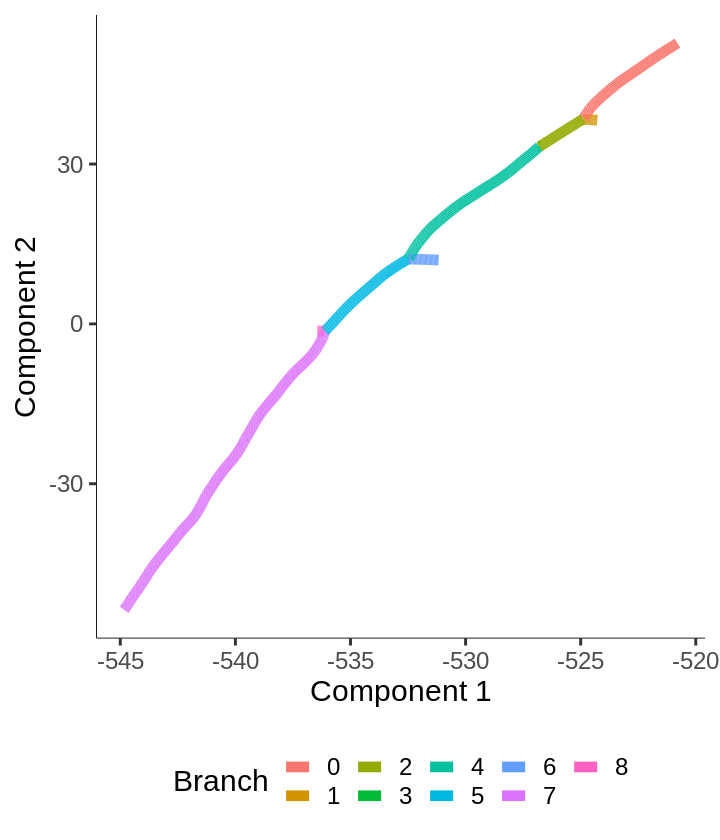

In [18]:
options(repr.plot.width=6, repr.plot.height=7)
merge(ddr.tree.full$tree, t(ddr.tree.full$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.full$Y), by.x="Centroid.J", by.y=0, all.x=T) %>%
    merge(., ddr.tree.full.branches, by.x="Centroid.I", by.y=0, all.x=T) %>%
    dplyr::filter(!is.na(Tree.Branch)) %>%
    ggplot() +
    geom_segment(aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y, color=factor(Tree.Branch)), size=I(3)) +
    labs(color="Branch") + xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_gene_expression_branch_assignment.svg", width=6, height=7)

In [19]:
tree.branches <- tree_dfs(as.matrix(ddr.tree.eigen$tree[,1:2]) - 1)

ddr.tree.eigen.branches <- cbind(as.data.frame(t(ddr.tree.eigen$Y)), tree.branches) %>%
    dplyr::select(Tree.Branch=tree.branches) %>%
    dplyr::mutate(Branch.Degree=ifelse(Tree.Branch < 0, abs(Tree.Branch), NA)) %>%
    dplyr::mutate(Tree.Branch=ifelse(Tree.Branch >= 0, Tree.Branch, NA))

head(ddr.tree.eigen.branches)

,Tree.Branch,Branch.Degree
,<dbl>,<dbl>
Centroid1,10,NA
Centroid2,1,NA
Centroid3,10,NA
Centroid4,6,NA
Centroid5,6,NA
Centroid6,5,NA


In [20]:
saveRDS(ddr.tree.eigen.branches, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigen.branches.RDS")

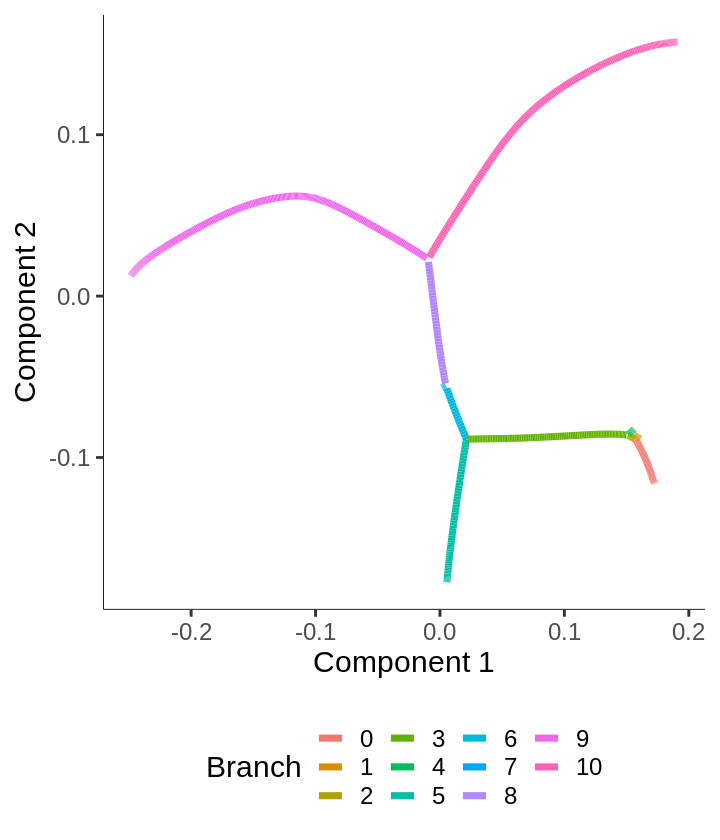

In [21]:
options(repr.plot.width=6, repr.plot.height=7)
merge(ddr.tree.eigen$tree, t(ddr.tree.eigen$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.eigen$Y), by.x="Centroid.J", by.y=0, all.x=T) %>%
    merge(., ddr.tree.eigen.branches, by.x="Centroid.I", by.y=0, all.x=T) %>%
    dplyr::filter(!is.na(Tree.Branch)) %>%
    ggplot() +
    geom_segment(aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y, color=factor(Tree.Branch)), size=I(2)) +
    labs(color="Branch") + xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_eigengene_expression_branch_assignment.svg", width=6, height=7)

In [22]:
tree.branches <- tree_dfs(as.matrix(ddr.tree.eigen.time.point$tree[,1:2]) - 1)

ddr.tree.eigen.time.point.branches <- cbind(as.data.frame(t(ddr.tree.eigen.time.point$Y)), tree.branches) %>%
    dplyr::select(Tree.Branch=tree.branches) %>%
    dplyr::mutate(Branch.Degree=ifelse(Tree.Branch < 0, abs(Tree.Branch), NA)) %>%
    dplyr::mutate(Tree.Branch=ifelse(Tree.Branch >= 0, Tree.Branch, NA))

head(ddr.tree.eigen.time.point.branches)

,Tree.Branch,Branch.Degree
,<dbl>,<lgl>
Centroid1,0,NA
Centroid2,0,NA
Centroid3,0,NA
Centroid4,0,NA
Centroid5,0,NA
Centroid6,0,NA


In [23]:
saveRDS(ddr.tree.eigen.time.point.branches, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigen.time.point.branches.RDS")

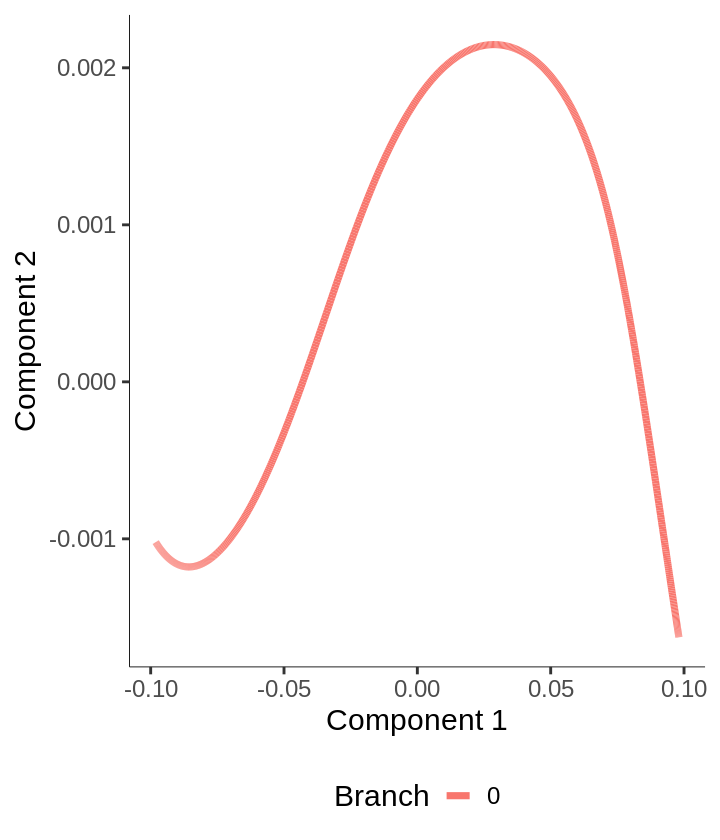

In [24]:
options(repr.plot.width=6, repr.plot.height=7)
merge(ddr.tree.eigen.time.point$tree, t(ddr.tree.eigen.time.point$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.eigen.time.point$Y), by.x="Centroid.J", by.y=0, all.x=T) %>%
    merge(., ddr.tree.eigen.time.point.branches, by.x="Centroid.I", by.y=0, all.x=T) %>%
    dplyr::filter(!is.na(Tree.Branch)) %>%
    ggplot() +
    geom_segment(aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y, color=factor(Tree.Branch)), size=I(2)) +
    labs(color="Branch") + xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_eigengene_time_point_expression_branch_assignment.svg", width=6, height=7)

## Project Samples onto Tree

The $i$-th sample in the data will have a latent position $\mathbf{z}_i$. By projecting this point onto the tree, we can start calculating pseudotimes and also assign each sample to a branch.

The projection for a given sample's latent position $\mathbf{z}$ works as follows:

1. Identify the line segment formed by the tree over $\mathbf{Y}$ that is closest to $\mathbf{z}$. Let this segment be defined by points $\mathbf{a},\mathbf{b}\in\mathbf{Y}$.

For each segment from $\mathbf{a}$ to $\mathbf{b}$, we can calculate the minimum distance $d$ from the point $\mathbf{z}$ to the segment as

$$t=\frac{(\mathbf{z} - \mathbf{a})\cdot (\mathbf{b} - \mathbf{a})}{|\mathbf{b} - \mathbf{a}|^2}$$

$$d=\begin{cases}
\frac{|(\mathbf{z} - \mathbf{a})\times (\mathbf{z} - \mathbf{b})|}{|\mathbf{b} - \mathbf{a}|} & 0\leq t \leq 1\\
\min \{ |\mathbf{a} - \mathbf{z}|, |\mathbf{b} - \mathbf{z}| \} & t < 0, t > 1
\end{cases}$$

2. Project the vector $\mathbf{z}-\mathbf{a}$ onto $\mathbf{b}-\mathbf{a}$. That is, the projected point $\mathbf{z}^*$ is

$$\mathbf{z}^* = \mathbf{a} + (\mathbf{b} - \mathbf{a})t$$

In [25]:
Rcpp::sourceCpp("04_Expression/scripts/utils/tree_projection.cpp")

The projected points use 0-indexed values of the centroid. By construction, a point will be projected on a segment with two endpoints from the same branch, one endpoint from a branch and one endpoint that is a branch point, or two branch points.

In [26]:
full.projected = tree_projection(ddr.tree.full$Z, ddr.tree.full$Y, as.matrix(ddr.tree.full$tree[,1:2]) - 1)
colnames(full.projected) <- c("Proj.Comp1", "Proj.Comp2", "Centroid.I", "Centroid.J")

full.projected <- full.projected %>%
    as.data.frame() %>%
    dplyr::mutate(Centroid.I.Branch = ddr.tree.full.branches[Centroid.I + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Centroid.J.Branch = ddr.tree.full.branches[Centroid.J + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Projected.Branch = ifelse(is.na(Centroid.I.Branch), Centroid.J.Branch, Centroid.I.Branch)) %>%
    dplyr::select(Proj.Comp1, Proj.Comp2, Centroid.I, Centroid.J, Projected.Branch)

head(full.projected)

,Proj.Comp1,Proj.Comp2,Centroid.I,Centroid.J,Projected.Branch
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-531.8613,16.239189,490,649,4
2,-523.9035,43.344999,178,721,0
3,-537.9048,-11.468402,236,854,7
4,-537.5581,-9.618375,45,833,7
5,-538.9927,-17.340475,406,665,7
6,-533.3837,9.752377,67,595,5


In [27]:
saveRDS(full.projected, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.full.projected.RDS")

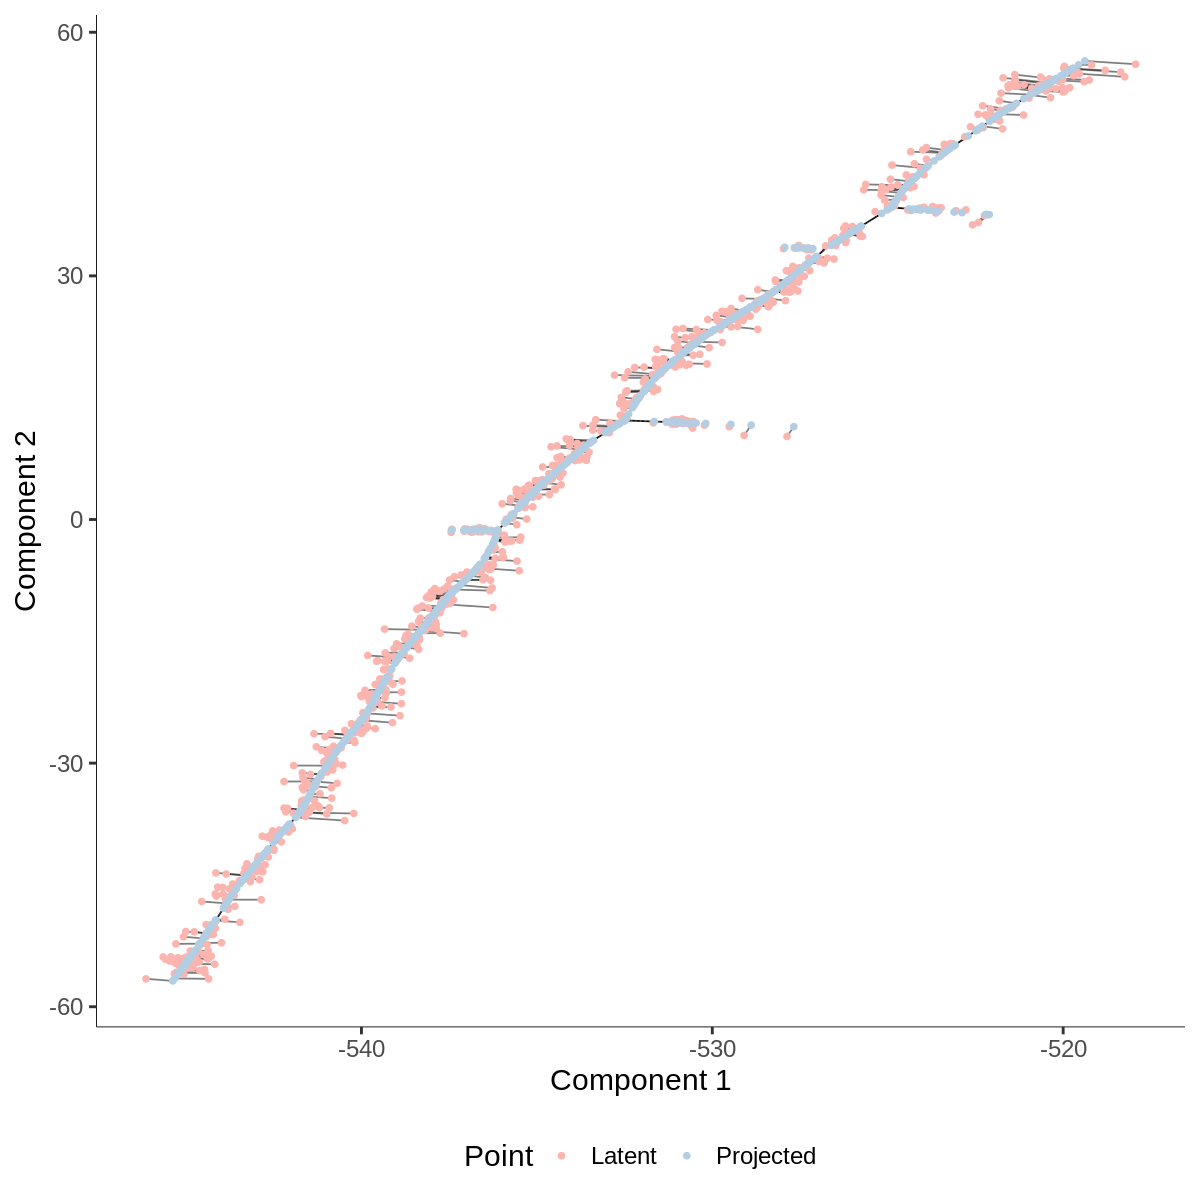

In [28]:
options(repr.plot.width=10, repr.plot.height=10)

tree.data <- merge(ddr.tree.full$tree, t(ddr.tree.full$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.full$Y), by.x="Centroid.J", by.y=0, all.x=T)

dplyr::bind_rows(
    t(ddr.tree.full$Z) %>%
        as.data.frame() %>%
        dplyr::mutate(Point="Latent") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.full$Z)),
    full.projected %>%
        as.data.frame() %>%
        dplyr::select(Comp1=Proj.Comp1, Comp2=Proj.Comp2) %>%
        dplyr::mutate(Point="Projected") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.full$Z))
) %>%
    ggplot(aes(x=Comp1, y=Comp2)) +
    geom_segment(data=tree.data, aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y)) +
    geom_line(aes(group=Sample), alpha=0.5) +
    geom_point(aes(color=Point)) +
    scale_color_brewer(palette="Pastel1") +
    xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_gene_expression_projected_samples.svg", width=10, height=10)

The projected points use 0-indexed values of the centroid. By construction, a point will be projected on a segment with two endpoints from the same branch, one endpoint from a branch and one endpoint that is a branch point, or two branch points.

In [29]:
eigen.projected = tree_projection(ddr.tree.eigen$Z, ddr.tree.eigen$Y, as.matrix(ddr.tree.eigen$tree[,1:2]) - 1)
colnames(eigen.projected) <- c("Proj.Comp1", "Proj.Comp2", "Centroid.I", "Centroid.J")

eigen.projected <- eigen.projected %>%
    as.data.frame() %>%
    dplyr::mutate(Centroid.I.Branch = ddr.tree.eigen.branches[Centroid.I + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Centroid.J.Branch = ddr.tree.eigen.branches[Centroid.J + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Projected.Branch = ifelse(is.na(Centroid.I.Branch), Centroid.J.Branch, Centroid.I.Branch)) %>%
    dplyr::select(Proj.Comp1, Proj.Comp2, Centroid.I, Centroid.J, Projected.Branch)

head(eigen.projected)

,Proj.Comp1,Proj.Comp2,Centroid.I,Centroid.J,Projected.Branch
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.126214436,0.14182606,318,471,10
2,0.165979776,-0.07746619,254,377,1
3,0.062460127,0.10583917,210,708,10
4,0.001275724,-0.04056539,59,214,8
5,-0.010324574,-0.06116444,244,755,7
6,0.006191292,-0.17227260,170,223,5


In [30]:
saveRDS(eigen.projected, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigen.projected.RDS")

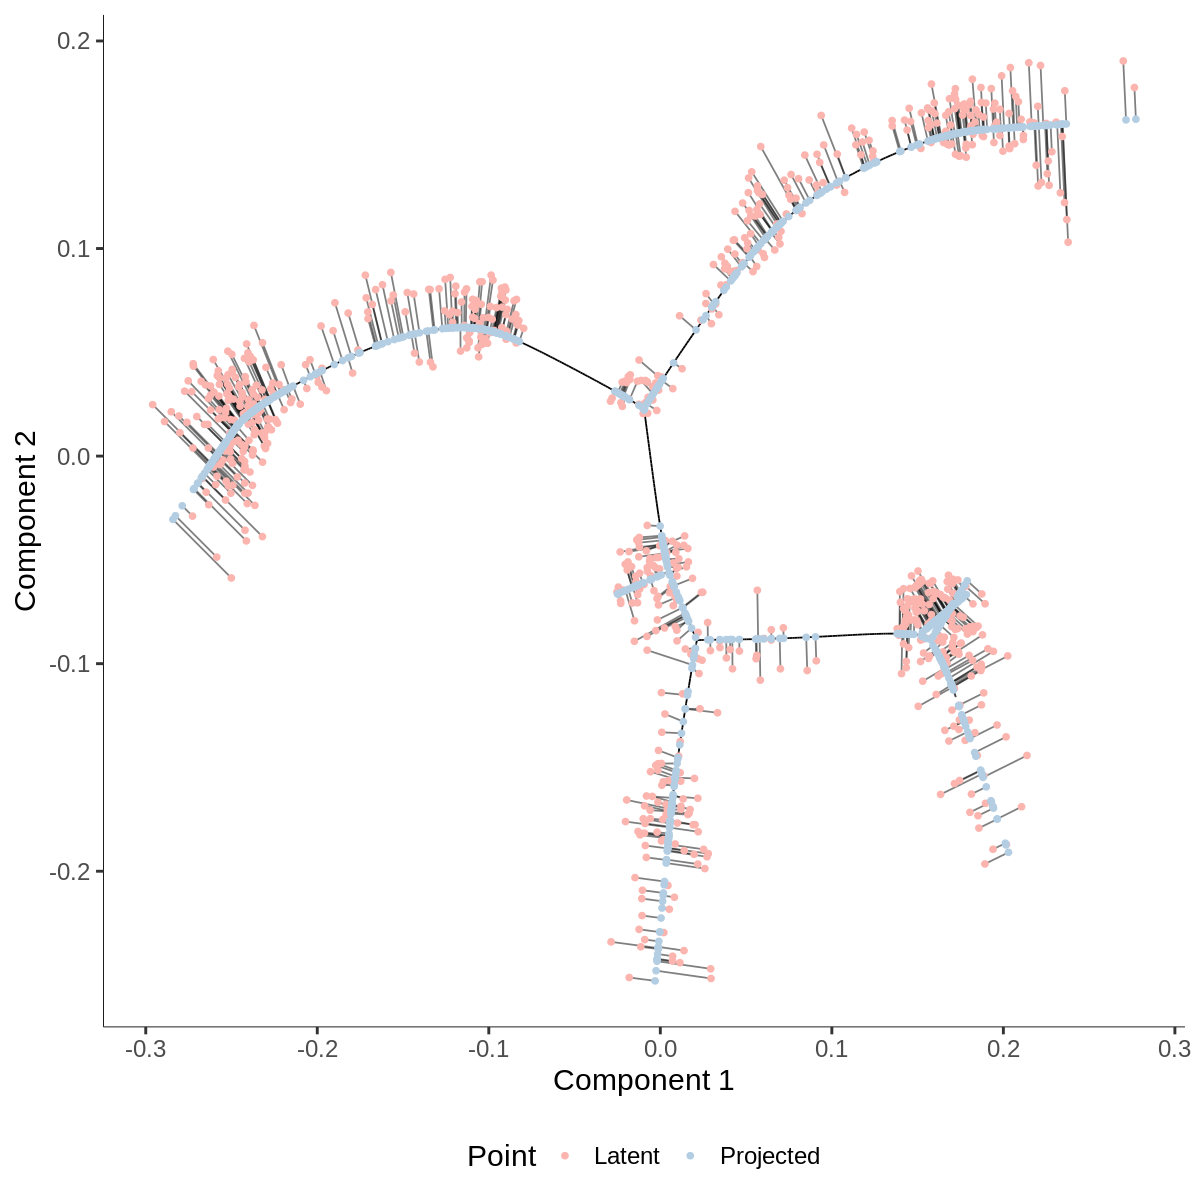

In [31]:
options(repr.plot.width=10, repr.plot.height=10)

tree.data <- merge(ddr.tree.eigen$tree, t(ddr.tree.eigen$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.eigen$Y), by.x="Centroid.J", by.y=0, all.x=T)

dplyr::bind_rows(
    t(ddr.tree.eigen$Z) %>%
        as.data.frame() %>%
        dplyr::mutate(Point="Latent") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.eigen$Z)),
    eigen.projected %>%
        as.data.frame() %>%
        dplyr::select(Comp1=Proj.Comp1, Comp2=Proj.Comp2) %>%
        dplyr::mutate(Point="Projected") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.eigen$Z))
) %>%
    ggplot(aes(x=Comp1, y=Comp2)) +
    geom_segment(data=tree.data, aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y)) +
    geom_line(aes(group=Sample), alpha=0.5) +
    geom_point(aes(color=Point)) +
    scale_color_brewer(palette="Pastel1") +
    xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_eigengene_expression_projected_samples.svg", width=10, height=10)

The projected points use 0-indexed values of the centroid. By construction, a point will be projected on a segment with two endpoints from the same branch, one endpoint from a branch and one endpoint that is a branch point, or two branch points.

In [32]:
eigen.time.point.projected = tree_projection(ddr.tree.eigen.time.point$Z, ddr.tree.eigen.time.point$Y, as.matrix(ddr.tree.eigen.time.point$tree[,1:2]) - 1)
colnames(eigen.time.point.projected) <- c("Proj.Comp1", "Proj.Comp2", "Centroid.I", "Centroid.J")

eigen.time.point.projected <- eigen.time.point.projected %>%
    as.data.frame() %>%
    dplyr::mutate(Centroid.I.Branch = ddr.tree.eigen.time.point.branches[Centroid.I + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Centroid.J.Branch = ddr.tree.eigen.time.point.branches[Centroid.J + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Projected.Branch = ifelse(is.na(Centroid.I.Branch), Centroid.J.Branch, Centroid.I.Branch)) %>%
    dplyr::select(Proj.Comp1, Proj.Comp2, Centroid.I, Centroid.J, Projected.Branch)

head(eigen.time.point.projected)

,Proj.Comp1,Proj.Comp2,Centroid.I,Centroid.J,Projected.Branch
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.064717912,0.0014720929,284,808,0
2,0.086992485,-0.0003719441,12,846,0
3,-0.005929391,0.0016373746,65,826,0
4,-0.063010180,-0.0008078672,239,803,0
5,-0.073529067,-0.0010645328,546,800,0
6,-0.037303916,0.0002770957,5,667,0


In [33]:
saveRDS(eigen.time.point.projected, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigen.time.point.projected.RDS")

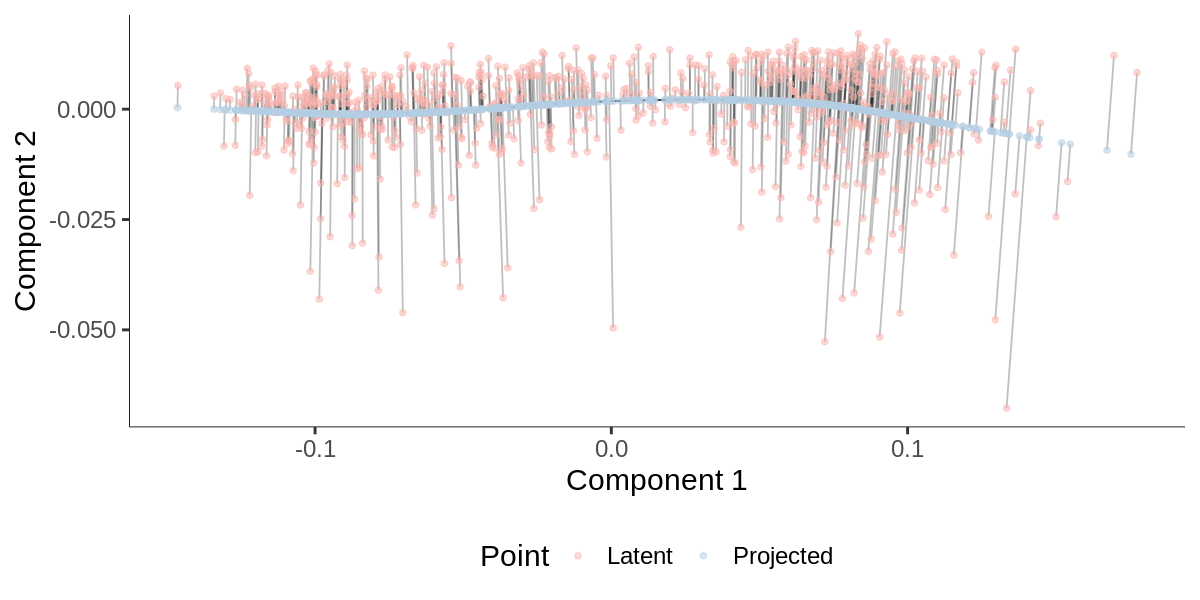

In [34]:
options(repr.plot.width=10, repr.plot.height=5)

tree.data <- merge(ddr.tree.eigen.time.point$tree, t(ddr.tree.eigen.time.point$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.eigen.time.point$Y), by.x="Centroid.J", by.y=0, all.x=T)

dplyr::bind_rows(
    t(ddr.tree.eigen.time.point$Z) %>%
        as.data.frame() %>%
        dplyr::mutate(Point="Latent") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.eigen.time.point$Z)),
    eigen.time.point.projected %>%
        as.data.frame() %>%
        dplyr::select(Comp1=Proj.Comp1, Comp2=Proj.Comp2) %>%
        dplyr::mutate(Point="Projected") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.eigen.time.point$Z))
) %>%
    ggplot(aes(x=Comp1, y=Comp2)) +
    geom_segment(data=tree.data, aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y)) +
    geom_line(aes(group=Sample), alpha=0.25) +
    geom_point(aes(color=Point), alpha=0.5) +
    scale_color_brewer(palette="Pastel1") +
    xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_eigengene_time_point_expression_projected_samples.svg", width=10, height=10)

## Calculate Pseudotime

Identify a Minimum Spanning Tree (MST) on the Projected Points using Kruskal's Algorithm. Choose a root node. Perform a DFS from the root node, accruing the distances between projected points to assign pseudotime.

In [35]:
Rcpp::sourceCpp("04_Expression/scripts/utils/tree_pseudotime.cpp")

In [36]:
projected.distances <- as.matrix(dist(eigen.time.point.projected[,c("Proj.Comp1", "Proj.Comp2")]))

In [37]:
root.node <- which(eigen.time.point.projected$Proj.Comp1 == min(eigen.time.point.projected$Proj.Comp1)) - 1

In [38]:
pseudotime = tree_pseudotime(projected.distances, root.node)

In [39]:
pseudotime.mtx <- as.matrix(pseudotime)
rownames(pseudotime.mtx) <- rownames(eigengenes)
colnames(pseudotime.mtx) <- c("Pseudotime")

In [40]:
saveRDS(pseudotime.mtx, "~/gains_team282/nikhil/expression/gene_expression/eigen.time.point.pseudotime.RDS")

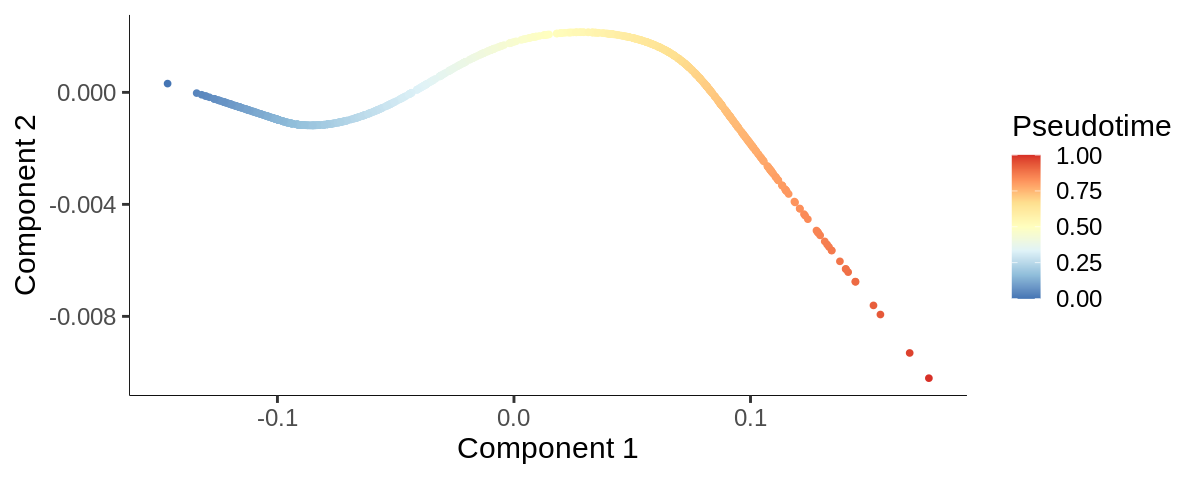

In [41]:
options(repr.plot.width=10, repr.plot.height=4)
cbind(eigen.time.point.projected, pseudotime.mtx) %>%
    as.data.frame() %>%
    ggplot() +
    geom_point(aes(x=Proj.Comp1, y=Proj.Comp2, color=Pseudotime)) +
    scale_color_distiller(palette="RdYlBu") +
    xlab("Component 1") + ylab("Component 2") +
    ggplot_theme +
    theme(legend.position="right")
ggsave("04_Expression/results/ddrtree_eigengene_trajectory_pseudotime.svg", width=10, height=4)